When it somes to evaluation there are three things you should memorize. Visualize, Visualize and visualize.

It's good idea to visualize:

The data - What data are we working with? What does itlook like?

The model itself - What doe our model look like.

The training of a model - how does model performs when it learns?

The prediction - How does the prediction of the model line up against the ground truth(the orignal lables)?

In [2]:
#creating a data set.
import tensorflow as tf
X = tf.range(-100, 100, 4)

In [3]:
#Make labels for the data set.

y = X + 10

print(X)
print(y)

tf.Tensor(
[-100  -96  -92  -88  -84  -80  -76  -72  -68  -64  -60  -56  -52  -48
  -44  -40  -36  -32  -28  -24  -20  -16  -12   -8   -4    0    4    8
   12   16   20   24   28   32   36   40   44   48   52   56   60   64
   68   72   76   80   84   88   92   96], shape=(50,), dtype=int32)
tf.Tensor(
[-90 -86 -82 -78 -74 -70 -66 -62 -58 -54 -50 -46 -42 -38 -34 -30 -26 -22
 -18 -14 -10  -6  -2   2   6  10  14  18  22  26  30  34  38  42  46  50
  54  58  62  66  70  74  78  82  86  90  94  98 102 106], shape=(50,), dtype=int32)


In [4]:
#Visualize the data

import matplotlib.pyplot as plt

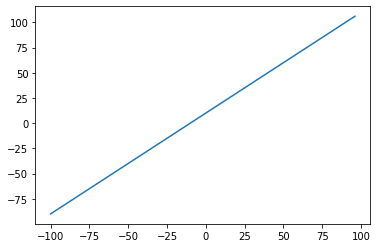

In [5]:
plt.plot(X,y)

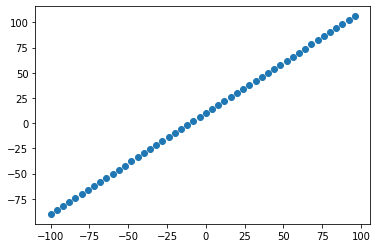

In [6]:
plt.scatter(X,y)

In [7]:
#Check the length of how many samples we have

len(X)

50

In [8]:
#split the dataset into train and test sets.

X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

40
10
40
10


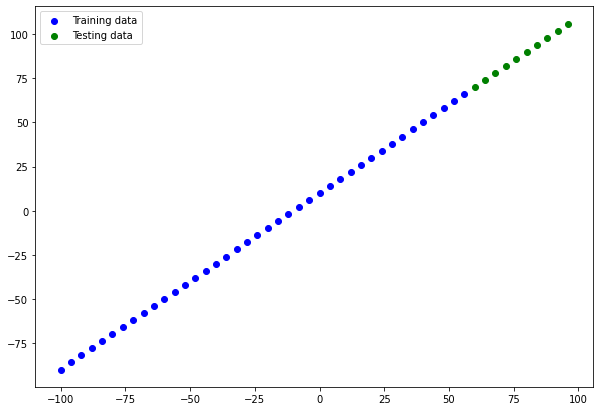

In [9]:
#visualizing the data.

# Now we have got our data in training and test set, Let's visualize it again.

plt.figure(figsize = (10,7))

#Plot trainig data in blue.

plt.scatter(X_train, y_train, c = "b", label = "Training data")

#plot testing data in green

plt.scatter(X_test, y_test, c = "g", label = "Testing data")

#show a legend.

plt.legend()

In [10]:
#create a model

model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [11]:
#compile thee model.

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [12]:
#visulaize the model

model.summary()

ValueError: ignored

In [13]:
#let's create a model which builds automatically by 
#definig the input shape arguments.

tf.random.set_seed(42)

In [14]:
#create a model(same as above)

model = tf.keras.Sequential(tf.keras.layers.Dense(1, input_shape = [1]))

In [15]:
#compile the model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])


In [16]:
#visualize the model.

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Total params - total no. of params in the model.

Trainable params - thses are the parameters (patterns) the model can update as it trains.

Non Trainable params - thses parameters arent updated during training. (This is typical when you bring in already learned pattern or parameters form other models during transfer learning.)

The actual parameters during dense layer are weights and biases.


In [17]:
#Lets fit our model to the training data.

model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 0)

In [ ]:
#verbose = 0, to not display the o/p.
#verbose = 1, to display the o/p.

In [18]:
#Get a summary of our model.

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


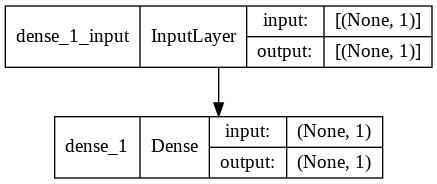

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model = model,show_shapes = True)

In [20]:
#make some model prediction

y_pred = model.predict(X_test)
y_pred

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [21]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [22]:
#lets create a plotting function

def plot_prediction(X_train, X_test, y_train, y_test,predictions = y_pred):
    plt.figure(figsize = (10,7))
    plt.scatter(X_train,y_train, c = 'b', label = "Training data")
    plt.scatter(X_test,y_test, c = 'g', label = "Testing data")
    plt.scatter(X_test,y_pred, c = 'r', label = "predictions")
    plt.legend()

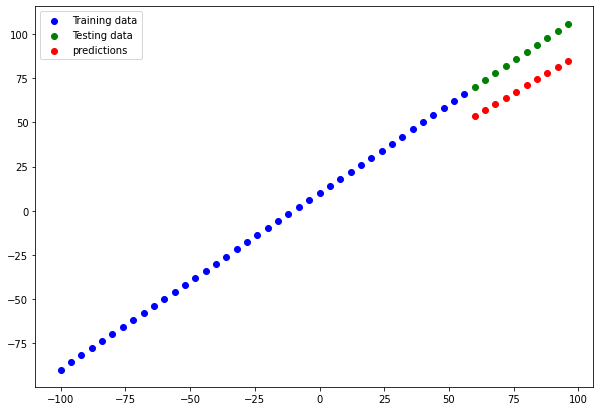

In [23]:
plot_prediction(X_train, X_test, y_train, y_test, predictions = y_pred)

Evaluating our models predictions with regression evaluation metrics.

Depending on the problem you are working o, there will be different evaluation metrics to evaluate your model's performance.

Since we are working on the regression, two of the main metrics:

*MAE(Mean absolute error) 

*MSE(Mean square error) 

*Huber: combination of MSE and MAE. Less sensitive to outliers than MSE.
         tf.keras.losses.Huber()

In [24]:
#Evaluate the model on test set.

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 118ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [25]:

#calculate the mean absolute error mae.

mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [26]:
#calculate mean_squared_error

mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

In [27]:
#Make some function to reuse MAE and MSE

def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true,
                                          tf.squeeze(y_pred))

In [28]:
mae(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [29]:
def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true, 
                                         tf.squeeze(y_pred))

In [30]:
mse(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

Runnning experiments to improve our model

To improve our model we can perfor following steps.

1. Get more data -  get more examples fory our model to train on(more opportunities to learn pattern or relationships between features and lables).

2. Make your model layer(using more complex model) - this might come in the form of more layersor more hidden units in each layer.

3. Train for longer - Give your model more of a chance to find patterns in the data.


Let's do 3 model experiments.

1. model_1 : same as orignal layer, 1 layer trained or 100 epochs.

2. model_2 : 2 layers, trained for 100 epochs.

3. model_3: 2 layers, trained for 500 epochs.

In [53]:
#Build model_1

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [54]:
#compile the model.

model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])


In [55]:
#fit the model

model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 0)

In [56]:
#make and plot prediction of model_1

y_pred_1 = model_1.predict(X_test)

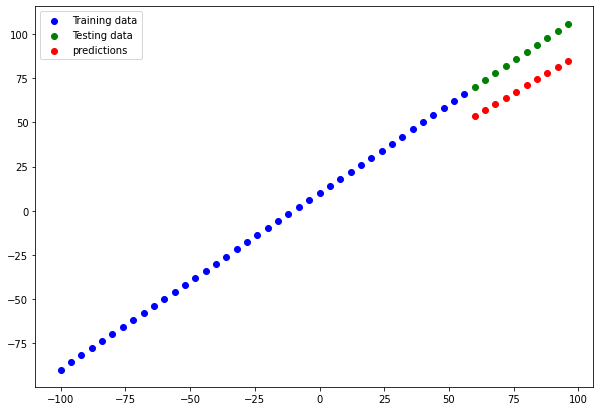

In [57]:
plot_prediction(X_train, X_test, y_train, y_test, predictions = y_pred_1)

In [58]:
#Calculate model_1 evaluation metrics.

mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)

In [59]:
mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=8.647593>

In [60]:
mse_1

<tf.Tensor: shape=(), dtype=float32, numpy=81.30821>

In [61]:
#Build model_2, 2 dense layer, trained for 100 epochs.

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

In [64]:
#compile model_2

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = tf.keras.metrics.mae)

In [65]:
#fit the model.

model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 0)

In [66]:
#make and plot prediction of model_2.

y_pred_2 = model.predict(X_test)

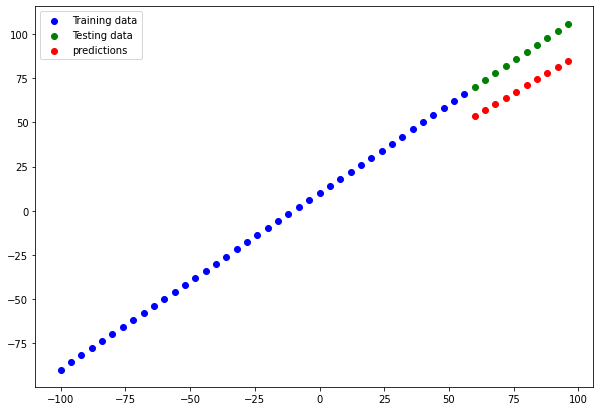

In [67]:
plot_prediction(X_train, X_test, y_train, y_test, y_pred_2)

In [68]:
#calculate model_2 evaluation metrics.

mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)

In [69]:
mae_2

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [70]:
mse_2

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

In [82]:
#build model_3. 2 layers trained for 500 epochs.

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

In [83]:
#compile model_3
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = tf.keras.metrics.mae)

In [84]:
#Fit model_3

model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 0)

In [85]:
#make and plot prediction of model_3

y_pred_3 = model.predict(X_test)

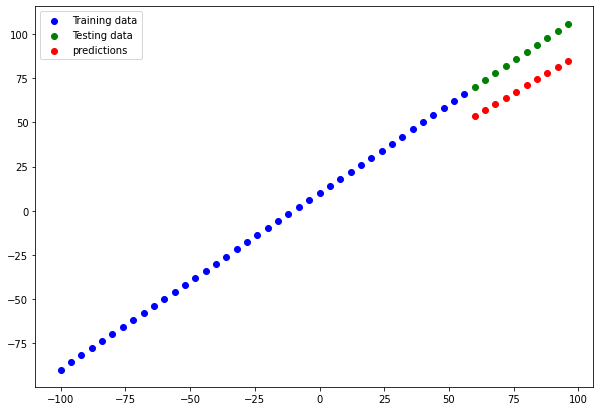

In [87]:
plot_prediction(X_train, X_test, y_train, y_test, y_pred)

In [88]:
#calculate model_3 evaluation metrics.

mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

In [89]:
mae_3

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [90]:
mse_3

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

In [91]:
#let's compare our model result using pandas.

import pandas as pd

In [97]:
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_result = pd.DataFrame(model_results,columns = ["model","mae", "mse"])

In [98]:
all_result

,model,mae,mse
0,model_1,8.647593,81.308212
1,model_2,18.745327,353.573364
2,model_3,18.745327,353.573364


In [101]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [102]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [103]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Note: One of our main goal should be minimize  the time between your experiments. The more experiments you do the more things you will figure out which don't work and in turn , get close to figuring out what does work. Remember the machine learning practioners moto: "experiment, experiment, experiment".



Tracking your experiments. 

One really good habbit in machine learning modelling is to track the result of your experiments. And when doing so, it can be tedious if you are running lots of experiments. 

Luckily there are tools to help us.

As you build more models, you'll want to look into using:

*Tensor Board: - a component of the tensorflow library to help track experiments.

*Weight and bias: a tool for tracking all kind of machine learning experiments. (Plugs straight into tensor board)

Savingour tensorflow model allows us to use them outside of google colab or wherever they were trained such as in web application or a mobile app.

There are two main formats we can save our models too:

1. The save model format
2. The HDF5 format.

In [104]:
#Save model using the save model format.

model_1.save("model_1_savemodel_format")

INFO:tensorflow:Assets written to: model_1_savemodel_format/assets


In [105]:
#Save model using the hdf5 format

model_1.save("model_1_HDF5_format.h5")

In [106]:
#loading saved model.

load_model_1 = tf.keras.models.load_model("/content/model_1_savemodel_format")

In [107]:
load_model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [108]:
#Compare model_1 prediction with saved model format prediction.

load_pred = load_model_1.predict(X_test)

In [110]:
model_1_prd = model_1.predict(X_test)

In [112]:
load_pred == model_1_prd

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [114]:
#compare mae

mae(y_test, model_1_prd) == mae(y_test, load_pred)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
#Download a file file from goolge colab using code.

from google.colab import files

files.download("/content/model_1_savemodel_format")

In [122]:
#Save a file from google colab to google drive.
#Requires mounting google drive.

!ls /content/drive/MyDrive/Tensorflow_Practise

In [125]:
!cp /content/model_1_HDF5_format.h5 /content/drive/MyDrive/Tensorflow_Practise

In [126]:
!ls /content/drive/MyDrive/Tensorflow_Practise

model_1_HDF5_format.h5
